#### 本次成绩:100   

### 评卷标准:
- 分析，理顺，项目要求并落实在文档中   √
- 比较不同结果 ，思考，改进，总结。   √
- 成绩提交并截图成绩   √
- 最终结论，报告。    √

很用心，整个文档有美观度，结构都很棒，内容有细节，有思考，有实践，和少洋的一样，都可以当作 模板使用了。加油

#### 评卷：David

# Kaggle 房屋价格预测比赛

Author: shenfuli<br>
Date: 2018/04/12 <br>
**Table of Contents:**<br>

1. 导入依赖库和加载数据集
2. 检视源数据
3. 房屋价格分析
4. 数据预处理
5. 模型的预测 
6. 模型集成 
7. 结论 

**Kaggle 项目地址**<br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques<br>
**Kaggle 是个什么东西？ **<br>
Kaggle是一个数据分析建模的应用竞赛平台，有点类似KDD-CUP（国际知识发现和数据挖掘竞赛），企业或者研究者可以将问题背景、数据、期望指标等发布到Kaggle上，以竞赛的形式向广大的数据科学家征集解决方案。而热爱数(dong)据(shou)挖(zhe)掘(teng)的小伙伴们可以下载/分析数据，使用统计/机器学习/数据挖掘等知识，建立算法模型，得出结果并提交，排名top的可能会有奖金<br>


## 1. 房屋价格预测描述

## 1.1 比赛描述

<img src="images/housesbanner.png" width="80%">

影响房屋价格的因素有很多，这里提供79个维度的真实房价的数据，通过比赛可以训练一个房屋预测的模型，
然后通过该模型预测，根据不同房屋的特点，预测其价格。

## 1.2 需要技能

* 特征工程处理
* 房价预测为连续的数值，需要回归技术，例如： 随机森林和gradient boosting

## 1.3 提供的文件说明

**文件描述**<br>
train.csv - 训练数据集<br>
test.csv - 测试数据集<br>
data_description.txt - 数据中每列的描述<br>
sample_submission.csv -提交任务的结果文件<br>

## 2. 房屋价格预测

## 2.1 导入依赖库和加载数据集

In [1]:
# 加入依赖库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

发现input 有两个文件，train.csv 提供训练的文件，有特征和label，test.csv 是模型预测的数据，没有label

In [2]:
# 查看input 目录的文件列表
import os
print(os.listdir("./input"))

['train.csv', 'test.csv']


一般来说源数据的index那一栏没什么用，我们可以用来作为我们pandas dataframe的index。这样之后要是检索起来也省事儿。<br>
Kaggle上默认把数据放在input文件夹下。<br>

In [3]:
# 加载训练呵测试数据,
train_df = pd.read_csv("./input/train.csv",index_col=0)
test_df = pd.read_csv("./input/test.csv",index_col=0)

## 2.2 检视源数据

这一部分，主要对数据源进行检测分析，了解数据的含义信息

In [4]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.shape

(1460, 80)

In [6]:
test_df.shape

(1459, 79)

## 2.3 房屋价格分析

* SalePrice 目标数据进行分析<br>
是我们的目标，我们需要分析SalePrice 的分布情况，事件尝试，符合“正态分布” 的数据可以达到比较好的结果

In [7]:
y_train = train_df["SalePrice"]

In [8]:
# 通过describe 函数查看对应的数据分布
y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f825c34c990>]], dtype=object)

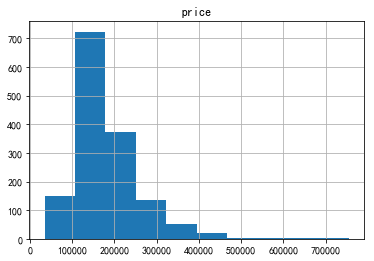

In [9]:
# 通过 pd 中的hist  通过使用DataFrame 的hist() 方法绘制直方图atplotlib / pylab. 
%matplotlib inline
price = pd.DataFrame({"price":y_train})
price.hist()

对原始数据的中的目标的分布进行分析，发现不符合“正态分布”，我们期望目标数据服从“正态分布”（又称高斯分布），可以通过log的方法对训练目标<br>
进行转化来实现

* log 函数转化<br>
通过log函数对目标数据SalePrice转化，可以使其符合正态分布

In [10]:
logprice_y_train = np.log1p(train_df["SalePrice"])

In [11]:
logprice_y_train.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f824c7f3150>]], dtype=object)

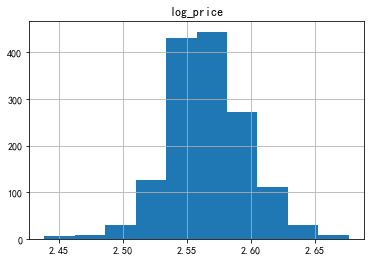

In [12]:
%matplotlib inline
logPrice = pd.DataFrame({"log_price":np.log1p(logprice_y_train)})
logPrice.hist()

* 分析哪些特征与SalePrice更相关

训练文本中给出很多数值类的变量，很难观察到他们与SalePrice的关系，那么我们可以集中观察SalePrice变量（最后一行和最右侧一列），我们发现
OverallQual, GrLivArea, and GarageCars 与SalePrice具有强相关性，这三个数值从直觉上看对房屋价格比较敏感

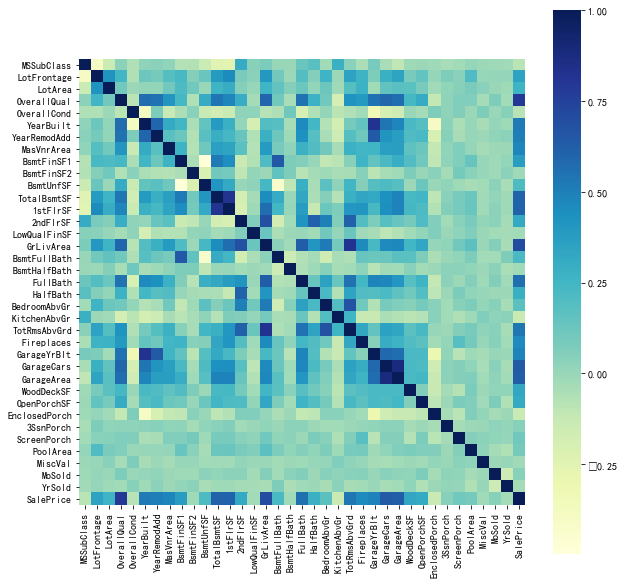

In [13]:
# 数值类型的矩阵
corrmat=train_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,square=True, cmap="YlGnBu");

## 2.4  数据的预处理

关于数据的预处理，主要在机器学习的特征工程需要做的事情，主要针对数据缺失处理、离散特征进行One-Hot编码、数值类变量的处理。为了对整个数据集
进行相关的分析处理，这里需要合并train和test数据。

* merge train和test

In [14]:
# 80 列，其中有1列是SalePrice
train_df.shape

(1460, 80)

In [15]:
# 79 列，唯一区别train_df，没有SalePrice列
test_df.shape

(1459, 79)

In [16]:
# train_df 去除掉目标列
df_train = train_df.copy()
df_test = test_df.copy()
df_train = df_train.drop('SalePrice', axis=1)

In [17]:
print(df_train.shape)
print(df_test.shape)

(1460, 79)
(1459, 79)


In [18]:
# merge train和test数据值
df_full = pd.concat([df_train,df_test],axis=0)

In [19]:
df_full.shape

(2919, 79)

In [20]:
df_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [21]:
df_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


* 缺失特征数据处理

In [22]:
# 分析数据的缺失情况,获取缺失数据的百分比
percent_na = (df_full.isnull().sum()/len(df_full))*100
ratio_na = percent_na.sort_values(ascending=False) # 升序排序
missing_data = pd.DataFrame({'Missing Ratio' :ratio_na}) # dataframe 表示
missing_data.head(10)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageQual,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


通过分析结果发现，前6个变量的缺失数值验证，缺失率大于15% 以上。这里对缺失严重的数据处理，选择比较暴力的方式，直接删除

In [23]:
# 缺失率大于15%的特征全部删除
df_full.drop('PoolQC', axis=1, inplace=True)
df_full.drop('MiscFeature', axis=1, inplace=True)
df_full.drop('Alley', axis=1, inplace=True)
df_full.drop('Fence', axis=1, inplace=True)
df_full.drop('FireplaceQu', axis=1, inplace=True)
df_full.drop('LotFrontage', axis=1, inplace=True)

In [24]:
df_full.shape# 79 列减少为73 列

(2919, 73)

In [25]:
df_full.columns

Index([u'MSSubClass', u'MSZoning', u'LotArea', u'Street', u'LotShape',
       u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir',
       u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageCars', u'GarageArea', u'GarageQual',
       u'G

In [26]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 73 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non-null object
MasVnrArea       2896 non

In [27]:
# 所有特征按照不同的数据类型进行分组
df_full.columns.to_series().groupby(df_full.dtypes).groups

{dtype('int64'): Index([u'MSSubClass', u'LotArea', u'OverallQual', u'OverallCond', u'YearBuilt',
        u'YearRemodAdd', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
        u'GrLivArea', u'FullBath', u'HalfBath', u'BedroomAbvGr',
        u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'WoodDeckSF',
        u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch',
        u'PoolArea', u'MiscVal', u'MoSold', u'YrSold'],
       dtype='object'),
 dtype('float64'): Index([u'MasVnrArea', u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF',
        u'TotalBsmtSF', u'BsmtFullBath', u'BsmtHalfBath', u'GarageYrBlt',
        u'GarageCars', u'GarageArea'],
       dtype='object'),
 dtype('O'): Index([u'MSZoning', u'Street', u'LotShape', u'LandContour', u'Utilities',
        u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
        u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl',
        u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual',
        u'ExterCond', 

* 离散的类别特征处理-One-Hot编码

In [28]:
df_full['MSSubClass'] = df_full['MSSubClass'].astype(str)

In [29]:
# 获取所有离散类别的列
categorial_variables = list(df_full.select_dtypes(exclude=['int64', 'float64', 'bool']).columns.values)
# 没有类别列进行处理
df_full[categorial_variables] = df_full[categorial_variables].apply(lambda x: x.fillna("None"),axis=0)

In [30]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 73 columns):
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 non-null object
MasVnrArea       2896 no

我们注意到，MSSubClass 的值其实应该是一个category，使用DF的时候，这类数字符号会被默认记成数字，我们需要强制性转化为str类型

* 数值类特征处理

In [31]:
# 对数值类的数据进行处理
numeric_variables = list(df_full.select_dtypes(include=['int64', 'float64']).columns.values)
# 数据类数据补充，直接获取列的均值，然后对缺失的数值进行填充
df_full[numeric_variables] = df_full[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)

In [32]:
df_full.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [33]:
df_full.shape

(2919, 73)

In [34]:
# 通过 pd.get_dummies把所有类别的变量 都One-Hot 编码
all_dummy_df = pd.get_dummies(df_full)
all_dummy_df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
2,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
3,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
4,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
5,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
# 发现已经从73 列扩展到301列的特征
all_dummy_df.shape

(2919, 301)

通过以上数据的预处理，对离散的类别变量和数值类的变量进行了处理，最终生成301 列的特征

这一步并不是必要，但是得要用的分类器是什么。一般来说，regression的分类器对数据分布有要求，为了后续选择regression进行训练，最好是把源数据给放在一个标准分布内。不要让数据间的差距太大。

数据标准化分布：(X-X平均)/标准差，让我们的数据更加平滑、偏于我们计算

In [36]:
numeric_variables_mean = all_dummy_df.loc[:,numeric_variables].mean() 
numeric_variables_std = all_dummy_df.loc[:,numeric_variables].std() 

In [37]:
all_dummy_df.loc[:, numeric_variables] = (all_dummy_df.loc[:, numeric_variables] - numeric_variables_mean)/ numeric_variables_std

In [38]:
all_dummy_df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.528944,0.580860,-0.292975,-0.934622,-0.444202,...,0,0,0,1,0,0,0,0,1,0
2,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.566919,1.177960,-0.292975,-0.629710,0.477076,...,0,0,0,1,0,0,0,0,1,0
3,0.137173,0.646073,-0.507197,0.980053,0.848819,0.338845,0.097911,-0.292975,-0.288392,-0.298976,...,0,0,0,1,0,0,0,0,1,0
4,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.566919,-0.494799,-0.292975,-0.047193,-0.671117,...,0,0,0,1,1,0,0,0,0,0
5,0.518814,1.355319,-0.507197,0.947040,0.753100,1.389978,0.468903,-0.292975,-0.160966,0.211585,...,0,0,0,1,0,0,0,0,1,0


In [39]:
all_dummy_df.shape

(2919, 301)

上面主要对数据空值，缺失率高的特征直接删除了、数值类型的缺失数据进行填充、离散类型特征进行One-Hot编码、对数值类的特征进行标准化。

## 2.5  模型训练和预测

In [40]:
from sklearn.model_selection import train_test_split # import train_test split from sklearn model_selection
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor from sklearn ensemble
from sklearn.metrics import r2_score, make_scorer, mean_squared_error # import metrics from sklearn
from time import time
from sklearn.model_selection import GridSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import ShuffleSplit # Random permutation cross-validator

### 2.5.1 数据处理，分成满足训练条件的训练数据和测试数据集

In [41]:
dummy_df_train = all_dummy_df.loc[train_df.index]
dummy_df_test = all_dummy_df.loc[test_df.index]

In [42]:
dummy_df_train.shape

(1460, 301)

In [43]:
dummy_df_test.shape

(1459, 301)

In [44]:
logprice_y_train.shape

(1460,)

In [45]:
# 从训练样本中分别切分成 训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(dummy_df_train, logprice_y_train, random_state=42)

### 2.5.3 XGBoost

XGBoost 是一个集成Gradient Boosting，是一个非常好用的算法。无论是在kaggle还是工业界都是一个比较好用的方法

In [46]:
# 导入xgboost相关包
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


* 用sklearn的接口

In [47]:
xgb_opt = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
	learning_rate=0.05, max_depth=3, 
	min_child_weight=1.7817, n_estimators=2200,
	reg_alpha=0.4640, reg_lambda=0.8571,
	subsample=0.5213, silent=1,
	seed =7, nthread = -1)

In [48]:
xgb_opt.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4603,
       gamma=0.0468, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1.7817, missing=None, n_estimators=2200,
       nthread=-1, objective='reg:linear', reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=7, silent=1,
       subsample=0.5213)

In [49]:
xgb_opt_predict = xgb_opt.predict(X_test) #XGBoost predictions

In [50]:
# XGBoost
xgb_r2 = r2_score(y_test, xgb_opt_predict)
xgb_mse = mean_squared_error(y_test, xgb_opt_predict)

In [51]:
# Let's compare them using a dataframe
d = {'1.XGBoost': [xgb_r2, xgb_mse]}
d_i = ['R2', 'Mean Squared Error']
df_results = pd.DataFrame(data=d, index = d_i)
df_results

,1.XGBoost
R2,0.913570
Mean Squared Error,0.014966


In [52]:
# 这对实际的结果通过np.expm1 逆向获取实际数据数值
y_test_xgb = np.expm1(y_test)
y_pred_xgb = np.expm1(xgb_opt_predict)

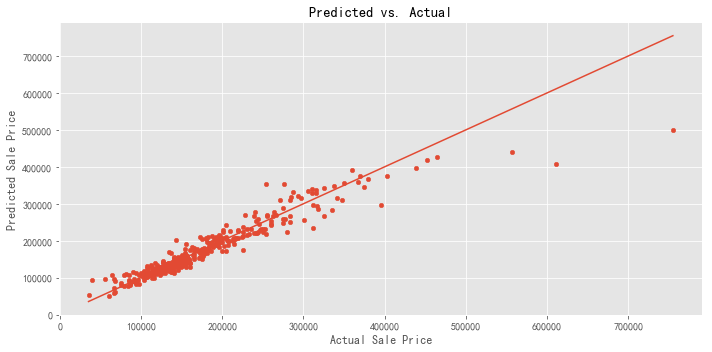

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# 预测价格VS预测价格
plt.figure(figsize=(10, 5))
plt.scatter(y_test_xgb, y_pred_xgb, s=20) 
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test_xgb), max(y_test_xgb)], [min(y_test_xgb), max(y_test_xgb)])
plt.tight_layout()

* 不用sklearn 的xgb接口

### 2.5.4 LightGBM

## 2.6 不同权重模型融合

* 汇总展示FR、xgboost的评测标准信息

In [54]:
d = {
     '2. XGBoost': [xgb_r2, xgb_mse]}
d_i = ['R2', 'Mean Squared Error']
df_results = pd.DataFrame(data=d, index = d_i)
df_results

,2. XGBoost
R2,0.913570
Mean Squared Error,0.014966


In [55]:
# 获取最终的预测结果
y_pred_xgb = xgb_opt.predict(dummy_df_test)

## 2.7 提交结果

In [56]:
y_pred_xgb.shape

(1459,)

In [57]:
y_final = np.expm1(y_pred_xgb)

In [58]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_final})
submission_df.head(10)

,Id,SalePrice
0,1461,125753.203125
1,1462,163547.781250
2,1463,178370.937500
3,1464,190953.421875
4,1465,187595.890625
5,1466,174699.343750
6,1467,180873.281250
7,1468,165006.031250
8,1469,191398.281250
9,1470,121018.585938


In [59]:
submission_df.to_csv('submission-20180414-xgb.csv', index=False)

## 参考内容

1. 机器学习系列(3)_逻辑回归应用之Kaggle泰坦尼克之灾 <br> 
https://blog.csdn.net/han_xiaoyang/article/details/49797143 <br>
2. 项目路径 <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques  <br>
3. kernel参考 https://www.kaggle.com/hamzaben/tuned-random-forest-lasso-and-xgboost-regressors <br>
4. 模板的话可以看看  https://github.com/geekcompany/ResumeSample/blob/master/architect.md <br>
5. 奔驰在半年多以前在Kaggle办了一个比赛 <br>
https://www.kaggle.com/hakeem/stacked-then-averaged-models-0-5697 <br>
6. https://www.kaggle.com/xirudieyi/house-prices <br>
7. https://blog.csdn.net/chris_lee_hehe/article/details/78700140 <br>
8. 特征重要性图形展示 https://www.kaggle.com/dfitzgerald3/randomforestregressor <br>
9. xgboost 和LightGBM 
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

## kaggle 成绩分析

总共提交2次层次，第二次对xgboost的参数进行了调整，有变化。 不过还需要自己通过交叉验证进行，可能效果会更好


* 第一次成绩

<img src="images/score-1.png" width="80%">

* 第二次成绩

<img src="images/score-2.png" width="80%">

* 第三次成绩

<img src="images/score-3.png" width="80%">

## 项目总结

1. 对整个机器学习的过程了解的更加深刻，明确了处理一下实际的工业应用问题的实时流程<br>
2. 加深pandas、sklearn模型的接口理解、xgboost应用，懂得如何通过多个模型组合去解决不实际问题<br>
3. 更重要的可以学习kaggle的案例，掌握了学习方法，对以后自己在kaggle上学习也有很大的帮助<br>
4. 目前xgboost 使用sklearn接口，可以尝试后续使用sklearn的xgb接口再次训练一次，然后尝试结果<br>
5. xgboost 目前未使用交叉验证调整参数，后续 可以通过交叉验证选择最佳的超参数<br>
6. 模型融合角度上可以尝试使用LightGBM，然后根据不同的权重进行组合，进行验证<br>
7. 最终不用模型组合，只使用xgboost，发现效果确实比rf效果会好<br>

In [719]:
# 项目要求：
# 1.新建毕业notebook项目文档，命名为姓名全拼-final，并放至于http://sxy.julyedu.com:8001/tree/0.Teacher/Exam/Final/学员姓名全拼目录中/，
# 2.注册kaggle，并阅读项目详情
# 2.分析，理顺，项目要求并落实在文档中。20分
# 4.进行载入数据，清洗，建模，训练，预测等流程，并对相应步骤（及思想）进行说明并落实在文档中 50分
# 4.在kaggle完成至少两次或以上提交。记录成绩，分析成绩差异的原因。并落实在文档中。20
# 5.项目总结。对该项目做最后总结，可以是心得，也可以是教训。 并落实在文档中。10分
# 6.如在项目文档中参考引用了其它kernel。额外10分（但总分不超过100分）
# 
# 完成时间：
# 2018年4月15号前。